# Interactive Loss Landscape Visualization

This notebook creates an interactive 3D visualization of neural network loss landscapes across training epochs using matplotlib widgets.

In [6]:
# Setup Interactive Plotting
%matplotlib inline
# Don't set a specific backend initially - let matplotlib choose

In [7]:
# Import Required Libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import h5py
import ipywidgets as widgets
import plotly.graph_objects as go
import plotly.express as px

In [8]:
# Configure Data Loading Parameters
EPOCHS = 50
SURFACE_PATH_FMT = 'surfaces/surface_epoch_{}.h5'

In [9]:
# Define Surface Data Loading Function
def load_h5_surface(epoch):
    fname = SURFACE_PATH_FMT.format(epoch)
    with h5py.File(fname, 'r') as f:
        x = np.array(f['xcoordinates'][:])
        y = np.array(f['ycoordinates'][:])
        z = np.array(f['train_loss'][:])
    X, Y = np.meshgrid(x, y)
    return X, Y, z

In [10]:
# Load All Surface Data
surfaces = []
for epoch in range(EPOCHS):
    try:
        X, Y, Z = load_h5_surface(epoch)
        surfaces.append((X, Y, Z))
    except Exception:
        surfaces.append(None)

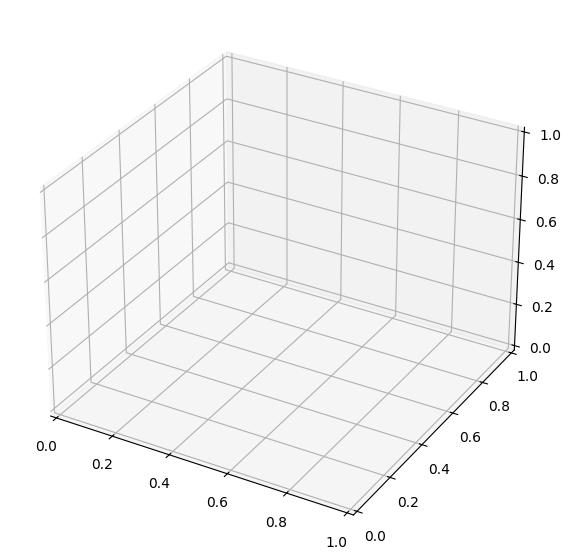

In [11]:
# Create 3D Plot Figure
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection='3d')

In [12]:
# Define Plot Update Function
def update(epoch):
    ax.clear()
    data = surfaces[epoch]
    if data is not None:
        X, Y, Z = data
        ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.85, edgecolor='none', antialiased=True)
        ax.set_xlabel('Direction X')
        ax.set_ylabel('Direction Y')
        ax.set_zlabel('Loss')
        ax.set_title(f'Loss Landscape at Epoch {epoch}', pad=15)
        ax.set_box_aspect([1,1,0.7])
    fig.canvas.draw_idle()

In [13]:
# Interactive 3D Plot with Full Mouse Controls
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display

def create_interactive_3d_plot(epoch):
    """Create a fully interactive 3D plot using Plotly"""
    data = surfaces[epoch]
    if data is None:
        print(f"No data available for epoch {epoch}")
        return
    
    X, Y, Z = data
    
    # Create the 3D surface plot
    fig = go.Figure(data=[go.Surface(
        x=X[0,:],  # x coordinates (1D)
        y=Y[:,0],  # y coordinates (1D) 
        z=Z,       # z values (2D)
        colorscale='Viridis',
        colorbar=dict(
            title="Loss Value",
            titleside="right",
            tickmode="linear",
            tick0=Z.min(),
            dtick=(Z.max()-Z.min())/10
        ),
        opacity=0.9,
        lighting=dict(
            ambient=0.4,
            diffuse=0.8,
            specular=0.1
        ),
        hovertemplate='Direction X: %{x}<br>Direction Y: %{y}<br>Loss: %{z}<extra></extra>'
    )])
    
    # Update layout for better interactivity
    fig.update_layout(
        title=dict(
            text=f'Interactive Loss Landscape - Epoch {epoch}',
            x=0.5,
            font=dict(size=16, color='darkblue')
        ),
        scene=dict(
            xaxis_title='Direction X',
            yaxis_title='Direction Y', 
            zaxis_title='Loss',
            camera=dict(
                eye=dict(x=1.2, y=1.2, z=0.6)
            ),
            aspectmode='cube',
            bgcolor='rgba(0,0,0,0)'
        ),
        width=900,
        height=700,
        margin=dict(l=0, r=0, b=0, t=40)
    )
    
    return fig

# Create the interactive widget
def update_plot(epoch):
    fig = create_interactive_3d_plot(epoch)
    if fig:
        fig.show()

# Create slider for epoch selection
epoch_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=EPOCHS-1,
    step=1,
    description='Epoch:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style={'description_width': 'initial'}
)

# Create interactive widget
interactive_widget = widgets.interact(update_plot, epoch=epoch_slider)

print("🎮 FULLY INTERACTIVE 3D CONTROLS:")
print("• 🖱️  Click and drag to ROTATE the 3D plot")
print("• 🔍 Scroll wheel to ZOOM in/out")
print("• 📌 Shift+click+drag to PAN the view")
print("• 🏠 Double-click to reset to home view")
print("• 🎚️ Use slider to change epochs")
print("• 📊 Hover over surface for exact values")
print("\n✨ This plot is fully interactive - move it around with your mouse!")

interactive(children=(IntSlider(value=0, description='Epoch:', max=49, style=SliderStyle(description_width='in…

🎮 FULLY INTERACTIVE 3D CONTROLS:
• 🖱️  Click and drag to ROTATE the 3D plot
• 🔍 Scroll wheel to ZOOM in/out
• 📌 Shift+click+drag to PAN the view
• 🏠 Double-click to reset to home view
• 🎚️ Use slider to change epochs
• 📊 Hover over surface for exact values

✨ This plot is fully interactive - move it around with your mouse!


In [14]:
# Alternative: Multiple View Angles for Better Exploration
def show_multiple_angles(epoch):
    """Show the same epoch from 4 different angles"""
    data = surfaces[epoch]
    if data is None:
        print(f"No data available for epoch {epoch}")
        return
    
    X, Y, Z = data
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12), subplot_kw={'projection': '3d'})
    fig.suptitle(f'Loss Landscape at Epoch {epoch} - Multiple Views', fontsize=18, fontweight='bold')
    
    # Different viewing angles
    angles = [(30, 45), (30, 135), (60, 45), (10, 45)]
    titles = ['Standard View', 'Side View', 'Top View', 'Low Angle']
    
    for i, (ax, (elev, azim), title) in enumerate(zip(axes.flat, angles, titles)):
        surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, 
                             edgecolor='none', antialiased=True)
        ax.set_xlabel('Direction X')
        ax.set_ylabel('Direction Y') 
        ax.set_zlabel('Loss')
        ax.set_title(title, fontsize=14)
        ax.view_init(elev=elev, azim=azim)
        ax.set_box_aspect([1,1,0.6])
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Create widget for multiple angle view
epoch_selector = widgets.IntSlider(min=0, max=EPOCHS-1, step=1, value=0, 
                                 description='Select Epoch:', style={'description_width': 'initial'})
widgets.interact(show_multiple_angles, epoch=epoch_selector)

interactive(children=(IntSlider(value=0, description='Select Epoch:', max=49, style=SliderStyle(description_wi…

<function __main__.show_multiple_angles(epoch)>